In [5]:
import pandas as pd


In [3]:
df = pd.read_csv('HP_T20_2020_1.CSV',encoding='cp949')

In [135]:
# 0~ 26
# 50~59
# 80~88
gubun_num = []
for i in range(23):
    gubun_num.append(i)
gubun_num.append('ZZ')
for i in range(23,27):
    gubun_num.append(i)
for i in range(50,60):
    gubun_num.append(i)
for i in range(80,89):
    gubun_num.append(i)
gubun_num.append('-')

gubun_dir = ['일반의','내과','신경과','정신과','외과','정형외과','신경외과','흉부외과',
            '성형외과','마취통증의학과','산부인과','소아청소년과','인과','이비인후과',
            '피부과','비뇨기과','영상의학과','방사선과','병리과','진단검사의학과',
            '결핵과', '재할의학과','핵의학과','결측','가정의학과','응급의학과','산업의학과',
            '예방의학과','구강악안면외과','치과보철과','치과교정과','소아치과',
            '치주과','치과보존과','구강내과','구강악면방사선과','구강병리과','예방치과',
            '한방내과','한방부인과','한방소아과','한방안과','한방신경정신과','침구과',
            '한방재활의학과','사상체질과','한방응급','정상 또는 해당사항 없음']
df_code = pd.DataFrame({'gubun_num':gubun_num,
                       'gubun_dir':gubun_dir})
df_code

,gubun_num,gubun_dir
0,0,일반의
1,1,내과
2,2,신경과
3,3,정신과
4,4,외과
5,5,정형외과
6,6,신경외과
7,7,흉부외과
8,8,성형외과
9,9,마취통증의학과


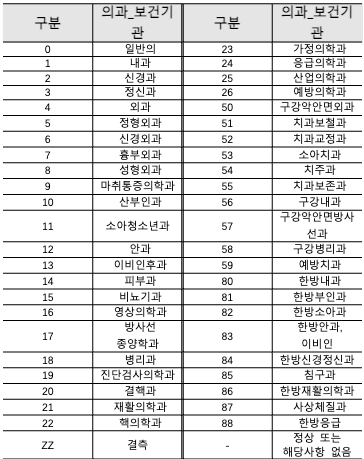



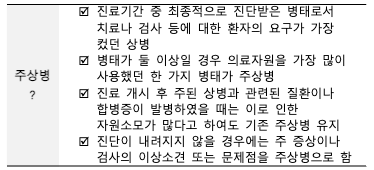

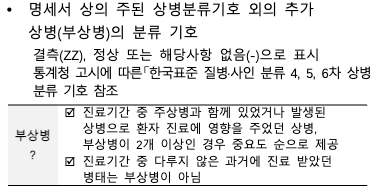

In [18]:
df
df[df['진료과목코드']== 14 ]

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자
52233,2020,2967,2002040,1,15,41,2020-02-03,3,14,L249,K297,1,1,0.15,11540,1500,10040,4,2021-12-28
52234,2020,2967,9607212,1,15,41,2020-06-22,3,14,L239,K297,1,1,0.15,11540,1500,10040,4,2021-12-28
52235,2020,2967,8280548,1,15,41,2020-07-07,3,14,L239,K297,1,1,0.15,11540,1500,10040,7,2021-12-28
52292,2020,21502,5852308,2,15,29,2020-10-12,3,14,L0100,K297,1,1,0.15,11540,1500,10040,3,2021-12-28
52319,2020,30481,3393970,2,15,11,2020-12-07,3,14,L0301,K297,1,1,0.15,11540,1500,10040,3,2021-12-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907731,2020,237318,1712732,2,3,41,2020-01-18,3,14,B081,L080,1,2,0.15,48870,14600,34270,1,2021-12-28
3907752,2020,262875,2767454,2,3,11,2020-01-04,3,14,D171,B081,1,2,0.15,192360,57700,134660,0,2021-12-28
3907761,2020,273629,4792935,1,3,41,2020-11-28,3,14,L84,B07,1,2,0.15,47440,14200,33240,0,2021-12-28
3907774,2020,301810,351478,2,3,11,2020-03-21,3,14,B07,L84,1,2,0.15,53520,16000,37520,0,2021-12-28


In [19]:
from urllib.request import urlopen
import requests
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

In [43]:
f_url = 'https://www.health.kr/researchInfo/disease.asp'
res = requests.get(f_url)
bs = BeautifulSoup(res.text, 'html.parser')
lis_count = int(bs.find('span',{'class':'count'}).text.replace(' ','').replace('총','').replace('건',''))
page_count = int(lis_count/10) +1
page_count




base_url = 'https://www.health.kr/researchInfo/disease.asp?inputField=&search_Term=a&paging_value=1'
for i in range(1,page_count+1)[:2]:
    url = base_url + str(i) +'&setLine=10&searchMode=&HV_Scroll=1'
    res = requests.get(url)
    bs4 = BeautifulSoup(res.text, 'html.parser')
    trs = bs4.find('table',{'class':'list_basic bt0'}).findAll('tr')[1:]
    param = tr.findAll('td')[3].find('a')['href']
    

In [ ]:


tr = trs[0]
# 질병 url


In [66]:


base_url = 'https://www.health.kr/researchInfo/'
url = base_url + param
res = requests.get(url)
bs4 = BeautifulSoup(res.text, 'html.parser')
trs = bs4.find('table',{'class':'infotable'}).findAll('tr')
#질환명
trs[0].find('td').text
#질환분류
trs[2].find('td').text
#상병코드
trs[3].find('td').text
# 증상
trs[6].find('td').text.replace('\n','').replace('\xa0','').replace('\r','')
url

'https://www.health.kr/researchInfo/disease_detail.asp?idx=311'

In [91]:
f_url = 'https://www.health.kr/researchInfo/disease.asp'
res = requests.get(f_url)
bs = BeautifulSoup(res.text, 'html.parser')
lis_count = int(bs.find('span',{'class':'count'}).text.replace(' ','').replace('총','').replace('건',''))
page_count = int(lis_count/10) +1
page_count

dis_id = []


base_url = 'https://www.health.kr/researchInfo/disease.asp?inputField=&search_Term=a&paging_value='
for i in range(1,page_count+1):
    url = base_url + str(i) +'&setLine=10&searchMode=&HV_Scroll=1'
    res = requests.get(url)
    bs4 = BeautifulSoup(res.text, 'html.parser')
    trs = bs4.find('table',{'class':'list_basic bt0'}).findAll('tr')[1:]
    for tr in trs:
        params = tr.findAll('td')[3].find('a')['href']
        dis_id.append(params)


dis_name = []
dis_dir = []
dis_code = []
dis_symt = []

for param in tqdm_notebook(dis_id):
    base_url = 'https://www.health.kr/researchInfo/'
    print(param)
    url = base_url + param
    res = requests.get(url)
    bs4 = BeautifulSoup(res.text, 'html.parser')
    trs = bs4.find('table',{'class':'infotable'}).findAll('tr')

    #질환명
    dis_name.append(trs[0].find('td').text)
    #질환분류
    dis_dir.append(trs[2].find('td').text)
    #상병코드
    dis_code.append(trs[3].find('td').text)
    # 증상
    if len(trs) >= 7:
        dis_symt.append(trs[6].find('td').text.replace('\n','').replace('\xa0','').replace('\r',''))
    else : 
        print(trs)
        dis_symt.append('None')
df_disease = pd.DataFrame({'dis_id':dis_id,
                           'dis_name':dis_name,
                          'dis_dir':dis_dir,
                          'dis_code':dis_code,
                          'dis_symt':dis_symt})

/var/folders/dn/p6q55ry15bs3kyb8qw78mrb00000gn/T/ipykernel_3873/3696484052.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for param in tqdm_notebook(dis_id):


  0%|          | 0/334 [00:00<?, ?it/s]

disease_detail.asp?idx=1
disease_detail.asp?idx=2
disease_detail.asp?idx=3
disease_detail.asp?idx=4
disease_detail.asp?idx=5
disease_detail.asp?idx=6
disease_detail.asp?idx=306
disease_detail.asp?idx=7
disease_detail.asp?idx=8
disease_detail.asp?idx=9
disease_detail.asp?idx=10
disease_detail.asp?idx=11
disease_detail.asp?idx=12
disease_detail.asp?idx=13
disease_detail.asp?idx=14
disease_detail.asp?idx=307
disease_detail.asp?idx=15
disease_detail.asp?idx=16
disease_detail.asp?idx=17
disease_detail.asp?idx=18
disease_detail.asp?idx=19
disease_detail.asp?idx=20
[<tr>
<th>질환명 (한글)</th>
<!--asp 질병기본정보 -->
<td>게실염</td>
<!--asp 질병기본정보 - 이미지로드 -->
<!--						<td rowspan="5" class="img">				-->
<td class="img" rowspan="5"><img alt="의약품 이미지" src="../images/drug_info/disease/Anatomy\멕켈게실.JPG"/><div class="infoOver view_drugimg"><a class="ico" href="#"></a><div class="popupbx"><a class="close ico" href="#" title="닫기"></a><img alt="의약품 이미지" src="../images/drug_info/disease/Anatomy\멕켈게실.JPG"/></div><

disease_detail.asp?idx=238
disease_detail.asp?idx=239
disease_detail.asp?idx=240
disease_detail.asp?idx=241
disease_detail.asp?idx=242
disease_detail.asp?idx=243
disease_detail.asp?idx=244
disease_detail.asp?idx=245
disease_detail.asp?idx=328
disease_detail.asp?idx=246
disease_detail.asp?idx=329
disease_detail.asp?idx=248
disease_detail.asp?idx=247
disease_detail.asp?idx=249
disease_detail.asp?idx=250
[<tr>
<th>질환명 (한글)</th>
<!--asp 질병기본정보 -->
<td>질염(위축성)</td>
<!--asp 질병기본정보 - 이미지로드 -->
<!--						<td rowspan="5" class="img">				-->
</tr>, <tr><th>질환명 (영문)</th><td>Atrophic Vaginitis</td></tr>, <tr><th>분류</th><td>비뇨생식기계 질환</td></tr>, <tr><th>상병코드</th><td>N952</td></tr>, <tr><th>정의</th><td><p style="line-height:12pt; margin-top:4pt; margin-bottom:4pt; margin-left:20;"><font face="굴림"><span style="font-size:9pt;">에스트로겐 
(여성 호르몬)양이 감소하여 질내의 정상적인 호르몬 양과 pH가 변한 결과로 생기는 
감염 또는 염증으로, 전염성이 없다.</span></font></p>
</td></tr>]
disease_detail.asp?idx=251
disease_detail.asp?idx=252
disease_detail.asp?

In [94]:
df_disease.head()

,dis_id,dis_name,dis_dir,dis_code,dis_symt
0,disease_detail.asp?idx=1,가막성후두염,호흡기계 질환,J050,컹컹하는 기침소리가 난다.컹컹거리기 전에 콧물이나 mild한 기침이 조금나다가 바로...
1,disease_detail.asp?idx=2,가스괴저,감염성 질환,A480,"국소는 동통이 심하고 부어올라 괴사하게 된 근은 검붉게 되며, 가스를 함유하므로압박..."
2,disease_detail.asp?idx=3,각막염,눈 및 귀 질환,H16,"눈에 통증이 느껴지며, 햇빛에 민감해지고, 눈물이 나온다."
3,disease_detail.asp?idx=4,각막진균증,눈 및 귀 질환,H18,"이물감, 눈부심, 눈물, 안통을 호소하며 눈꺼풀의 부기, 결막충혈, 모양체충혈이 나..."
4,disease_detail.asp?idx=5,각혈,기타 질환,R042,"혈액은 보통 기침과 함께 나오며, 선홍색이고 응고되지 않으며 알칼리성이고, 거품을 ..."


In [111]:
df_disease[df_disease['dis_symt']=='None']

,dis_id,dis_name,dis_dir,dis_code,dis_symt
21,disease_detail.asp?idx=20,게실염,소화기계 질환,K57,None
273,disease_detail.asp?idx=250,질염(위축성),비뇨생식기계 질환,N952,None


In [109]:
df_test = pd.merge(df_disease, df, left_on='dis_code',right_on='주상병코드',how='inner')

In [110]:
df_test.columns
df_test[['진료내역일련번호', '성별코드', '연령대코드', '진료과목코드', '주상병코드','dis_dir', '부상병코드', '데이터 기준일자','dis_name', 'dis_code', 'dis_symt']]

,진료내역일련번호,성별코드,연령대코드,진료과목코드,주상병코드,dis_dir,부상병코드,데이터 기준일자,dis_name,dis_code,dis_symt
0,8055708,2,15,1,J050,호흡기계 질환,L506,2021-12-28,가막성후두염,J050,컹컹하는 기침소리가 난다.컹컹거리기 전에 콧물이나 mild한 기침이 조금나다가 바로...
1,939141,1,2,1,J050,호흡기계 질환,J209,2021-12-28,가막성후두염,J050,컹컹하는 기침소리가 난다.컹컹거리기 전에 콧물이나 mild한 기침이 조금나다가 바로...
2,6001449,2,2,1,J050,호흡기계 질환,J209,2021-12-28,가막성후두염,J050,컹컹하는 기침소리가 난다.컹컹거리기 전에 콧물이나 mild한 기침이 조금나다가 바로...
3,1635785,2,9,1,J050,호흡기계 질환,J209,2021-12-28,가막성후두염,J050,컹컹하는 기침소리가 난다.컹컹거리기 전에 콧물이나 mild한 기침이 조금나다가 바로...
4,1580794,2,9,1,J050,호흡기계 질환,J209,2021-12-28,가막성후두염,J050,컹컹하는 기침소리가 난다.컹컹거리기 전에 콧물이나 mild한 기침이 조금나다가 바로...
...,...,...,...,...,...,...,...,...,...,...,...
121288,3860043,2,10,24,R17,기타 질환,L299,2021-12-28,황달,R17,황달이 있으면 피부점막이 황색으로 염색된다. 특히 안구결막이나 구강점막에서 조기 발...
121289,562295,2,11,1,R17,기타 질환,R946,2021-12-28,황달,R17,황달이 있으면 피부점막이 황색으로 염색된다. 특히 안구결막이나 구강점막에서 조기 발...
121290,8815656,1,11,24,R17,기타 질환,R508,2021-12-28,황달,R17,황달이 있으면 피부점막이 황색으로 염색된다. 특히 안구결막이나 구강점막에서 조기 발...
121291,10597102,1,13,1,R17,기타 질환,K839,2021-12-28,황달,R17,황달이 있으면 피부점막이 황색으로 염색된다. 특히 안구결막이나 구강점막에서 조기 발...


In [116]:
# df_1 = pd.read_csv('HP_T20_2020_1.CSV',encoding='cp949')
# df_2 = pd.read_csv('HP_T20_2020_2.CSV',encoding='cp949')
# df_3 = pd.read_csv('HP_T20_2020_3.CSV',encoding='cp949')
# df = pd.concat([df_1,df_2,df_3])
df = df.reset_index().drop(columns='index')

In [140]:
df_fin = pd.merge(df_disease, df, left_on='dis_code',right_on='주상병코드',how='inner')
df_fin = pd.merge(df_fin, df_code, left_on='진료과목코드',right_on='gubun_num',how='inner')
df_test1 = df_fin[['진료내역일련번호', '성별코드', '연령대코드','진료과목코드', 'gubun_dir', '주상병코드','dis_dir', '부상병코드', '데이터 기준일자','dis_name', 'dis_code', 'dis_symt']]

In [139]:
# 객관적 증상 데이터 
df_fin.to_csv('객관적증상데이터.csv',encoding='utf-8')
# 진료과목 코드 테이블 출저 : https://www.health.kr/
df_code.to_csv('진료과목번호_테이블.csv',encoding='utf-8')
# 상병코드별 증상 : 
df_disease.to_csv('상병코드별_증상.csv',encoding='utf-8')

In [155]:
df_fin

,dis_id,dis_name,dis_dir,dis_code,dis_symt,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,...,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자,gubun_num,gubun_dir
0,disease_detail.asp?idx=1,가막성후두염,호흡기계 질환,J050,컹컹하는 기침소리가 난다.컹컹거리기 전에 콧물이나 mild한 기침이 조금나다가 바로...,2020,224906,8055708,2,15,...,1,1,0.15,11570,1500,10070,6,2021-12-28,1,내과
1,disease_detail.asp?idx=1,가막성후두염,호흡기계 질환,J050,컹컹하는 기침소리가 난다.컹컹거리기 전에 콧물이나 mild한 기침이 조금나다가 바로...,2020,28261,939141,1,2,...,1,1,0.15,11540,3400,8140,3,2021-12-28,1,내과
2,disease_detail.asp?idx=1,가막성후두염,호흡기계 질환,J050,컹컹하는 기침소리가 난다.컹컹거리기 전에 콧물이나 mild한 기침이 조금나다가 바로...,2020,136420,6001449,2,2,...,1,1,0.15,11540,3400,8140,6,2021-12-28,1,내과
3,disease_detail.asp?idx=1,가막성후두염,호흡기계 질환,J050,컹컹하는 기침소리가 난다.컹컹거리기 전에 콧물이나 mild한 기침이 조금나다가 바로...,2020,172235,1635785,2,9,...,1,1,0.15,11540,3400,8140,14,2021-12-28,1,내과
4,disease_detail.asp?idx=1,가막성후두염,호흡기계 질환,J050,컹컹하는 기침소리가 난다.컹컹거리기 전에 콧물이나 mild한 기침이 조금나다가 바로...,2020,172235,1580794,2,9,...,1,1,0.15,11540,3400,8140,3,2021-12-28,1,내과
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362041,disease_detail.asp?idx=100,만성췌장염,소화기계 질환,K861,만성 췌장염일 경우 상복부에 통증이 지속된다. 통증은 수일 또는 수주간 지속되기도 ...,2020,120604,2960953,2,10,...,15,15,0.25,4366650,1374730,2991920,0,2021-12-28,55,치과보존과
362042,disease_detail.asp?idx=121,봉와직염=결합조직염,소화기계 질환,K122,"국소열감·압통 등이 따르는, 경계가 불분명한 홍반(erythema)으로 시작되고 점...",2020,613317,5913748,2,14,...,0,0,0.25,69280,0,69280,0,2021-12-28,55,치과보존과
362043,disease_detail.asp?idx=121,봉와직염=결합조직염,소화기계 질환,K122,"국소열감·압통 등이 따르는, 경계가 불분명한 홍반(erythema)으로 시작되고 점...",2020,613317,7089920,2,14,...,6,13,0.25,1294880,244400,1050480,0,2021-12-28,55,치과보존과
362044,disease_detail.asp?idx=273,파킨슨병,신경계 질환,G20,"1) 초기 증상 피로하고, 약간 비틀비틀하거나 의자에서 일어나기 어렵게 느껴진다....",2020,309067,4692613,2,18,...,0,0,0.20,45570,9110,36460,0,2021-12-28,18,병리과


In [154]:
list(set(df_dir_1['dis_symt']))

['요폐의 경우 상부요로에서 방광으로의 요의 유입은 통상과 같은 정도이나, 방광으로 부터 요가 배출되지 않으므로 요의 과저류가 일어난다.방광내압은 상승되고, 방광벽이 과신전되어 요의(micturtion)는 강한데 배뇨불능으로 심한 고통을 받게 된다. 하복부에 과신전된 방광이 압통성 종류로 촉진되는 일이 많다.',
 '복부 경련과 함께 설사(때로 피가 섞여나오기도 함), 발열, 백혈구 수의 증가, 혈압 강하 (때때로 맥박이 약해지고 심박이 빨라지는 등 쇼크를 일으키기도 함), 오심, 구토, 부위 감각 상실',
 '1) 짐을 들어올릴 때2) 재채기할 때 3) 기침하거나 웃을때 4) 배변시 힘을 줄 때 소변이 부지불식간에 조금씩 나온다.',
 '증식된 각질이 속살갗으로 향하기 때문에 강한 통각이 느껴진다.',
 '1. 초기증상 : 보통 증상이 없다. 2. 후기증상 : 협심증, 심발작',
 '이환된 부위에 따라 다르나, 주로 피부의 가려움이나 구진(papule), 사지의 대관절또는 그 주위의 심한 동통, 순환기계의 장애로 인한 고통이나 쇼크 증상 또는 중추신경 장애로 인한 지각·운동·시력·의식 등의 마비와 장애의 4가지 형이 있다.',
 '1. 일반증상가슴이 답답하고 숨을 헐떡거린다. 숨을 내쉴때 씩씩거리는 소리가 난다(천명). 기도가 폐쇄되면 공기를 통과시키기 어려워지고 좁은 통로로 공기를 내보내다 보니 천명이 들린다. 기 침 : 밤에 특히 심하며 가래가 약간 나온다. 호흡 곤란 : 목의 근육이 조이는 느낌이 난다. 앉다가 일어설때 호흡곤란이 갑자기 일어난다. 가슴이 커짐 또는 답답함(Enlarged chest) 2. 후기 중증상태의 증상 피부가 푸르스름, 심한 피로, 숨쉴때 소리가 난다(후두음). 말을 잘 못한다.',
 '변비가 있는 경우 종종 배변시의 통증, 하복부 팽만감, 불완전한 배변감 등이 동반될 수 있다.',
 '인두, 편도가 빨갛게 커지며 인후통이 있다.38.9도-40.6도의 고열이 난다.콧물이 나온다. 눈의 흰자위가 충혈되며 통증이 있다. 결막염은 대